In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [11]:
data = pd.read_csv("../Large_data/feature/bnp-paribas-card-claim/train.csv", nrows=50000) #house-prices
data.shape

(50000, 133)

In [12]:
#feature selection should be done after data preprocessing
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
#[col for col in data.columns if data[col].isnull().sum() > 0] #presence of null value

(50000, 114)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["target","ID"], axis =1),
    data["target"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape


((35000, 112), (15000, 112))

In [14]:
univariate = f_classif(X_train.fillna(0), y_train)
univariate

(array([2.11162492e+01, 5.06903417e+00, 4.27818275e+00, 1.95927569e+01,
        8.53173465e+00, 1.54298512e+01, 5.46509341e+00, 3.04682965e+01,
        8.24285946e+02, 2.68913033e+01, 9.66316909e+01, 3.19551560e+01,
        6.33578816e+02, 3.81883239e+01, 2.66401706e+01, 3.21455592e-01,
        5.48803980e+00, 3.13932541e+01, 2.39185299e+01, 9.98605317e+01,
        2.38686426e+01, 5.13173713e+00, 1.14013701e+01, 1.47892193e+01,
        2.09524865e+01, 1.82398726e+01, 3.47714707e+01, 5.14114122e+01,
        3.36632813e+02, 2.50797299e+01, 4.91492071e+01, 2.84653396e+01,
        1.48795180e+02, 1.83116171e+00, 3.93028656e+01, 2.20369384e+01,
        2.60488115e+01, 1.35485945e+01, 1.22121075e+01, 3.79558867e+01,
        6.12330299e+00, 4.72631041e+01, 2.57529828e+01, 2.25353557e+03,
        6.30730647e+01, 2.71971830e+01, 3.57244547e+00, 5.47203890e+01,
        1.87468953e+01, 3.63673671e+01, 1.33672376e+01, 9.62825324e+00,
        1.60122231e+01, 3.15569360e+02, 5.92990567e+00, 1.477996

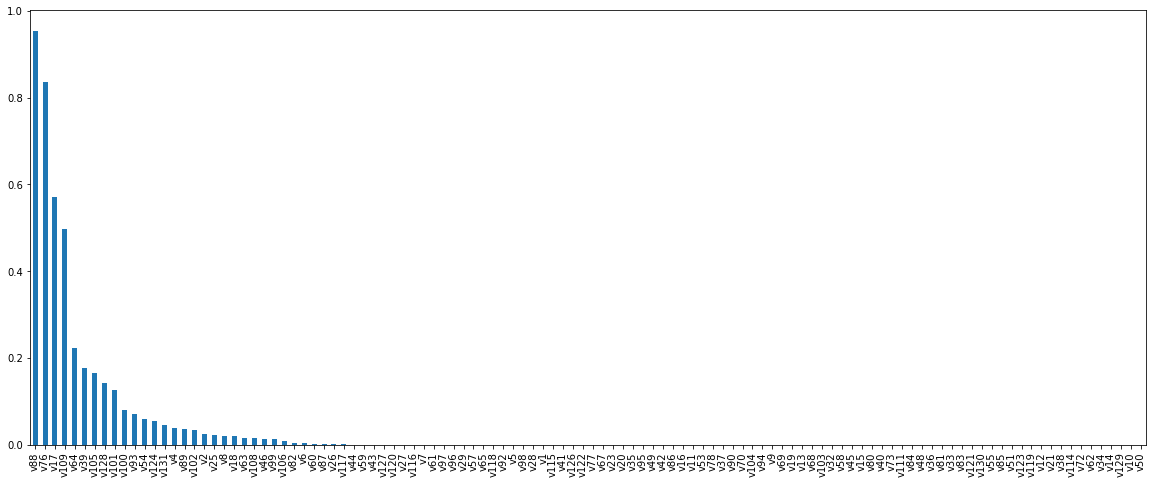

In [15]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [16]:
sel = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel.get_support()]

Index(['v10', 'v14', 'v21', 'v34', 'v38', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')

In [17]:
X_train = sel.transform(X_train.fillna(0))
X_train.shape

(35000, 10)

In [19]:
data = pd.read_csv("../Large_data/feature/house-prices/train.csv", nrows=50000) 
data.shape

(1460, 81)

In [20]:
#feature selection should be done after data preprocessing
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape
#[col for col in data.columns if data[col].isnull().sum() > 0] #presence of null value

(1460, 38)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["SalePrice"], axis =1),
    data["SalePrice"],
    test_size = 0.3,
    random_state = 0
)
del data
X_train.shape, X_test.shape


((1022, 37), (438, 37))

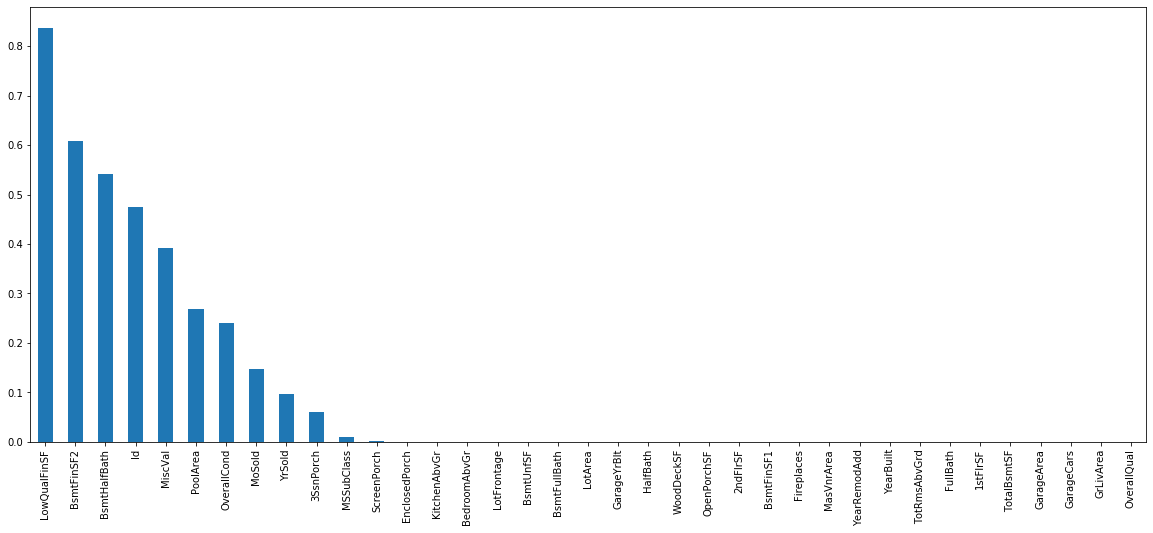

In [22]:
univariate = f_regression(X_train.fillna(0), y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [23]:
sel = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [24]:
X_train = sel.transform(X_train.fillna(0))
X_train.shape

(1022, 4)